# 随机森林（无参数算法）

- 随机森林是一种集成方法， 通过集成多个比较简单的评估器形成累积效果
- 这种集成方法的学习效果经常出人意料， 往往能超过各个组成部分的总和； 
    - 也就是说， 若干评估器的多数投票（majority vote）的最终效果往往优于单个评估器投票的效果

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## 1. 随机森林诱因：决策树

### 1.1 决策树及其简单应用

- 随机森林是建立在决策树基础上的集成学习器
- 决策树采用非常直观的方式对事物进行分类或打标签：你只需问一系列问题就可以进行分类了
- 决策树的难点在于如何设计每一步的问题
    - 在实现决策树的机器学习算法中，问题通常因分类边界是与特征轴平行的形式分割数据而造成的
    - 也就是说，决策树的每个节点都根据一个特征的阈值将数据分成两组
- 如果想在 Scikit-Learn 中使用决策树拟合数据，可以用DecisionTreeClassifier评估器

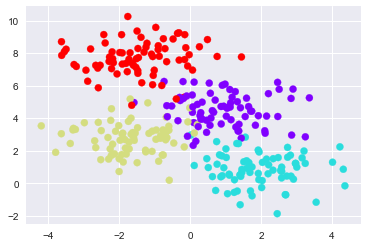

In [7]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

In [8]:
# 使用DecisionTreeClassifier分类器进行分类
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

C:\Users\清水木华\AppData\Roaming\Python\Python36\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


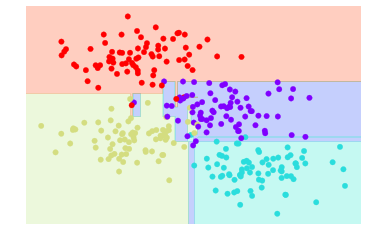

In [11]:
# 对上面分类器的结果进行可视化的函数
def visualize_classfier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # 画出训练数据
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap, clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # 用评估器拟合数据
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=300), np.linspace(*ylim, num=300))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # 为结果生成彩色图
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes+1)-0.5,
                          cmap=cmap, clim=(y.min(), y.max()), zorder=1)
    ax.set(xlim=xlim, ylim=ylim)

# 调用函数，检查决策树的分类结果
visualize_classfier(DecisionTreeClassifier(), X, y)

### 1.2 决策树与过拟合

- 过拟合其实正是决策树的一般属性——决策树非常容易陷得很深，因此往往会拟合局部数据，而没有对整个数据分布的大局观
    - 换个角度看这种过拟合， 可以认为模型训练的是数据的不同子集
- 就像用两棵决策树的信息改善分类结果一样， 我们可以用更多决策树的信息来改善分类结果

## 2. 评估器集成算法：随机森林

- 集成算法
    - 通过组合多个过拟合评估器来降低过拟合程度的是一种集成学习方法， 称为装袋算法
    - 装袋算法使用并行评估器对数据进行有放回抽取集成，每个评估器都对数据过拟合，通过求均值可以获得更好的分类结果
    - 随机决策树的集成算法就是随机森林
- 可以用 Scikit-Learn 的 BaggingClassifier 元评估器来实现这种装袋分类器
- 在 Scikit-Learn 里对随机决策树集成算法的优化是通过RandomForestClassifier评估器实现的，它会自动进行随机化决策

C:\Users\清水木华\AppData\Roaming\Python\Python36\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


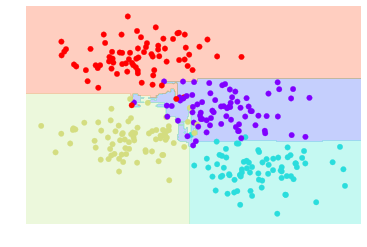

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)   # 让每个评估器拟合样本80%的随机数

visualize_classfier(bag, X, y)

C:\Users\清水木华\AppData\Roaming\Python\Python36\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


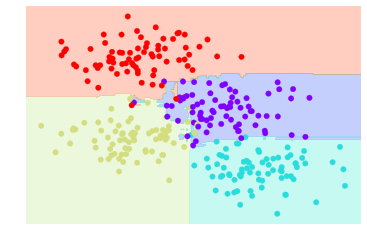

In [15]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classfier(model, X, y)

## 3. 随机森林回归

- 随机森林也可以用作回归（处理连续变量， 而不是离散变量）
    - 随机森林回归的评估器是RandomForestRegressor， 其语法与我们之前的类似
- 真实模型是平滑曲线， 而随机森林回归模型是锯齿线
- 无参数的随机森林模型非常适合处理多周期数据， 不需要我们配置多周期模型

<ErrorbarContainer object of 3 artists>

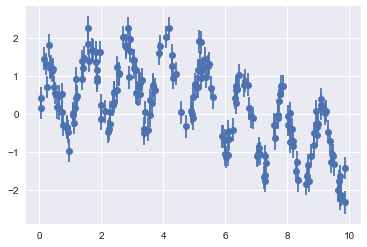

In [16]:
# 生成数据：通过快慢震荡组合而成
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))
    
    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o')

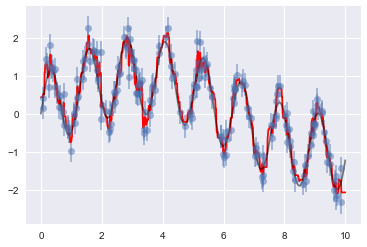

In [17]:
# 用随机森林回归器进行拟合
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r')
plt.plot(xfit, ytrue, '-k', alpha=0.5)

## 4. 案例：用随机森林识别手写数字

In [20]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()  # ['data', 'target', 'target_names', 'images', 'DESCR']

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

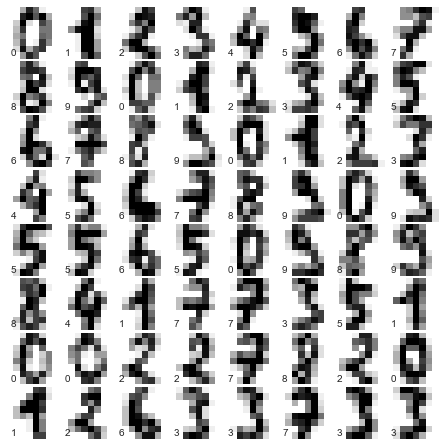

In [21]:
# 设置图像对象
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# 画图像【8 * 8】
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # 用target给图像做标注
    ax.text(0, 7, str(digits.target[i]))

In [25]:
# 用随机森林为数字图像分类
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state=0)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [26]:
# 察看分类结果报告
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

             precision    recall  f1-score   support

          0       1.00      0.97      0.99        38
          1       0.98      0.95      0.97        44
          2       0.95      1.00      0.98        42
          3       0.98      0.98      0.98        45
          4       0.97      1.00      0.99        37
          5       0.98      0.96      0.97        49
          6       1.00      1.00      1.00        52
          7       1.00      0.96      0.98        50
          8       0.94      0.98      0.96        46
          9       0.98      0.98      0.98        47

avg / total       0.98      0.98      0.98       450



Text(92.68, 0.5, 'predicted label')

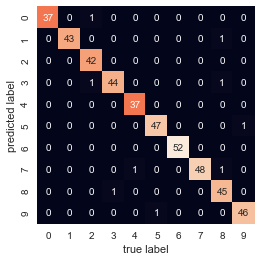

In [24]:
# 绘制混淆矩阵
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

## 5. 随机森林总结

- 随机森林模型——一种随机决策树集成算法
- 随机森林是一种强大的机器学习方法， 它的优势在于以下几点
    - 决策树的原理很简单， 所以它的训练和预测速度都非常快
    - 多任务可以直接并行计算， 因为每棵树都是完全独立的
    - 多棵树可以进行概率分类： 多个评估器之间的多数投票可以给出概率的估计值（使用 Scikit-Learn 的 predict_proba() 方法） 
    - 无参数模型很灵活， 在其他评估器都欠拟合的任务中表现突出
- 随机森林的主要缺点
    - 其结果不太容易解释，也就是说，如果你想要总结分类模型的意义，随机森林可能不是最佳选择